# COMP1800 - Data Visualization (Coursework)
<u>Introduction</u>: The task embarked upon involves a comprehensive analysis of ChrisCo, a fictional cinema chain in the UK, through the lens of data visualization. The process entails compiling and examining data to glean insights into the company's operations, customer demographics, and financial performance. This Jupyter Notebook outlines the steps taken and achievements made using Python, specifically within a Visual Studio Code environment.

#### Setting Up a Python Environment

Setting up a dedicated Python environment is essential for managing dependencies in data science projects. You can use either Anaconda or Miniconda for this purpose.

**Creating and Activating a New Environment**:


```bash
conda create --name COMP1800-DV python=3.10.10
conda activate COMP1800-DV
```


#### Installing Required Packages

Ensure all necessary packages are installed by using a `pip install` command that references a [`requirements.txt`](../Docs/requirements.txt) file. This file lists all packages needed to run the Jupyter notebook effectively.

**Installing and Updating Packages**:
```python
%pip install --upgrade -r ../Docs/requirements.txt --quiet
```
Note that the `--quiet` flag is used to suppress any unnecessary output from package installation, which can make it easier to see when there are errors.

**Setting Up an IPython Kernel for Jupyter**:

To use the new Python environment in Jupyter, install a new IPython kernel with the environment.


```bash
python -m ipykernel install --user --name=COMP1800-DV --display-name "COMP1800-DV(IPYNB)"
conda install -n COMP1800-DV ipykernel --update-deps --force-reinstall
```


This creates a kernel named `COMP1800-DV` for Jupyter, ensuring it uses the specific Python environment created for this coursework.

In [141]:
%pip install --upgrade -r ../Docs/requirements.txt --quiet

Note: you may need to restart the kernel to use updated packages.


## Importing Libraries
Importing necessary libraries needed for the this coursework.

In [207]:
try:
    import hvplot.pandas
    import math
    import squarify
    import panel as pn
    import pandas as pd
    import numpy as np
    import colorcet as cc
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    import matplotlib.dates as mdates
    import plotly.express as px
    import plotly.graph_objects as go
    from scipy import stats
    from statsmodels.tsa.seasonal import seasonal_decompose
    from scipy.stats import linregress
    from plotly.subplots import make_subplots
    from pandas.plotting import register_matplotlib_converters

    sns.set_theme(style="whitegrid")
except Exception as e:
    print(f"Error : {e}")

# Data Collection
Access and download the specific datasets from the provided links by replacing 'ID' with student ID number.

**Downloading  Datasets**:
```python
%run ../Datasets/download.py
```

This will download the datasets specified in coursework specificatiom into the 'Datasets' directory specified by the `directory` variable in [`download.py`](../Datasets/download.py).

In [143]:
%run ../Datasets/download.py

Downloaded and saved CinemaWeeklyVisitors.csv successfully.
Downloaded and saved CinemaAge.csv successfully.
Downloaded and saved CinemaCapacity.csv successfully.
Downloaded and saved CinemaMarketing.csv successfully.
Downloaded and saved CinemaOverheads.csv successfully.
Downloaded and saved CinemaSpend.csv successfully.


## Loading and Inspecting the Dataset
Datasets spanning weekly visitors, cinema ages, capacities, marketing expenditures, overheads, and customer spend were meticulously gathered and loaded for subsequent analysis.

In [174]:
directory = '../Datasets/'
age_df = pd.read_csv(f'{directory}CinemaAge.csv')
capacity_df = pd.read_csv(f'{directory}CinemaCapacity.csv')
marketing_df = pd.read_csv(f'{directory}CinemaMarketing.csv')
overheads_df = pd.read_csv(f'{directory}CinemaOverheads.csv')
spend_df = pd.read_csv(f'{directory}CinemaSpend.csv')
weekly_visitors_df = pd.read_csv(f'{directory}CinemaWeeklyVisitors.csv')

display(age_df.head(), capacity_df.head(), marketing_df.head(), overheads_df.head(), spend_df.head(), weekly_visitors_df.head())

,Id,Avg age (yrs)
0,UDD,27
1,CCX,38
2,VJV,41
3,WVA,45
4,AKA,26


,Id,Seating capacity
0,UDD,163
1,CCX,30
2,VJV,449
3,WVA,181
4,AKA,43


,Id,Marketing (£000s)
0,UDD,5
1,CCX,2
2,VJV,13
3,WVA,24
4,AKA,2


,Id,Overheads (£000s)
0,UDD,65
1,CCX,18
2,VJV,87
3,WVA,58
4,AKA,13


,Id,Avg spend (£)
0,UDD,15
1,CCX,19
2,VJV,15
3,WVA,15
4,AKA,12


,Date,UDD,CCX,VJV,WVA,AKA,JJQ,SJE,WQW,ZWY,...,TJN,TPY,TVJ,SDT,WKL,CWN,XQE,VPG,YCI,RPQ
0,2019-01-01,372,0,845,923,0,163,314,160,191,...,411,436,224,0,109,0,177,927,141,326
1,2019-01-08,378,0,1012,725,0,148,303,195,165,...,442,444,342,0,123,0,160,714,125,252
2,2019-01-15,360,0,944,1174,0,151,332,183,120,...,478,517,321,0,135,0,164,902,131,402
3,2019-01-22,347,0,905,796,0,152,319,199,137,...,505,406,231,0,110,0,212,901,129,265
4,2019-01-29,387,0,975,857,0,147,301,183,146,...,486,415,262,0,128,0,157,887,136,295


# Creating Dataframes
**Summary DataFrame**: This includes one row for each cinema, with details such as average age of visitors, seating capacity, marketing spend, overheads, and average spend per visitor.

**Customer DataFrame**: This is derived from the weekly visitors data, reformatted to include one row for each date with the cinema ID and the number of weekly visitors.

In [175]:
summary_df = pd.merge(age_df, capacity_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, marketing_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, overheads_df, on='Id', how='inner')
summary_df = pd.merge(summary_df, spend_df, on='Id', how='inner')

summary_df.columns = ['Cinema ID', 'Average Age (Years)', 'Seating Capacity', 'Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)']

customer_df = weekly_visitors_df.melt(id_vars=["Date"], var_name="Cinema ID", value_name="Weekly Visitors")

display(summary_df.head(), customer_df.head())

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
0,UDD,27,163,5,65,15
1,CCX,38,30,2,18,19
2,VJV,41,449,13,87,15
3,WVA,45,181,24,58,15
4,AKA,26,43,2,13,12


,Date,Cinema ID,Weekly Visitors
0,2019-01-01,UDD,372
1,2019-01-08,UDD,378
2,2019-01-15,UDD,360
3,2019-01-22,UDD,347
4,2019-01-29,UDD,387


## Exploratory Data Analysis
**Exploratory Data Analysis (EDA)**: Conduct an initial analysis to understand the dataset's structure, contents, and any immediate insights or anomalies.

### Understanding Correlation Values:
- **1 or -1**: A correlation of 1 indicates a perfect positive linear relationship between two variables, while -1 indicates a perfect negative linear relationship. This means that as one variable increases, the other variable either increases (in the case of 1) or decreases (in the case of -1) in a perfectly linear fashion.
- **0**: A correlation of 0 means there is no linear relationship between the variables.
- **Values between 0 and ±1**: These indicate the strength and direction of a linear relationship between the variables. Values closer to 1 or -1 signify stronger relationships.

'## Summary DataFrame Descriptive Statistics:'

,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
count,30.000000,30.000000,30.000000,30.000000,30.000000
mean,35.333333,116.433333,6.633333,63.733333,16.333333
std,6.503757,102.277069,7.246799,27.406183,4.837592
min,26.000000,30.000000,1.000000,13.000000,8.000000
25%,29.250000,37.750000,2.000000,49.250000,13.000000
50%,36.000000,88.000000,5.000000,67.500000,15.000000
75%,41.000000,161.500000,7.750000,85.500000,20.750000
max,45.000000,449.000000,35.000000,99.000000,25.000000


'Customer DataFrame Descriptive Statistics:'

,Weekly Visitors
count,6270.000000
mean,293.387081
std,293.733774
min,0.000000
25%,125.000000
50%,176.000000
75%,380.000000
max,1492.000000


'\nCorrelation Matrix:'

,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
Average Age (Years),1.000000,0.037670,0.200223,-0.069903,0.595856
Seating Capacity,0.037670,1.000000,0.700083,0.286457,-0.139132
Marketing Spend (£000s),0.200223,0.700083,1.000000,0.116860,0.023279
Overheads (£000s),-0.069903,0.286457,0.116860,1.000000,-0.231567
Average Spend (£),0.595856,-0.139132,0.023279,-0.231567,1.000000


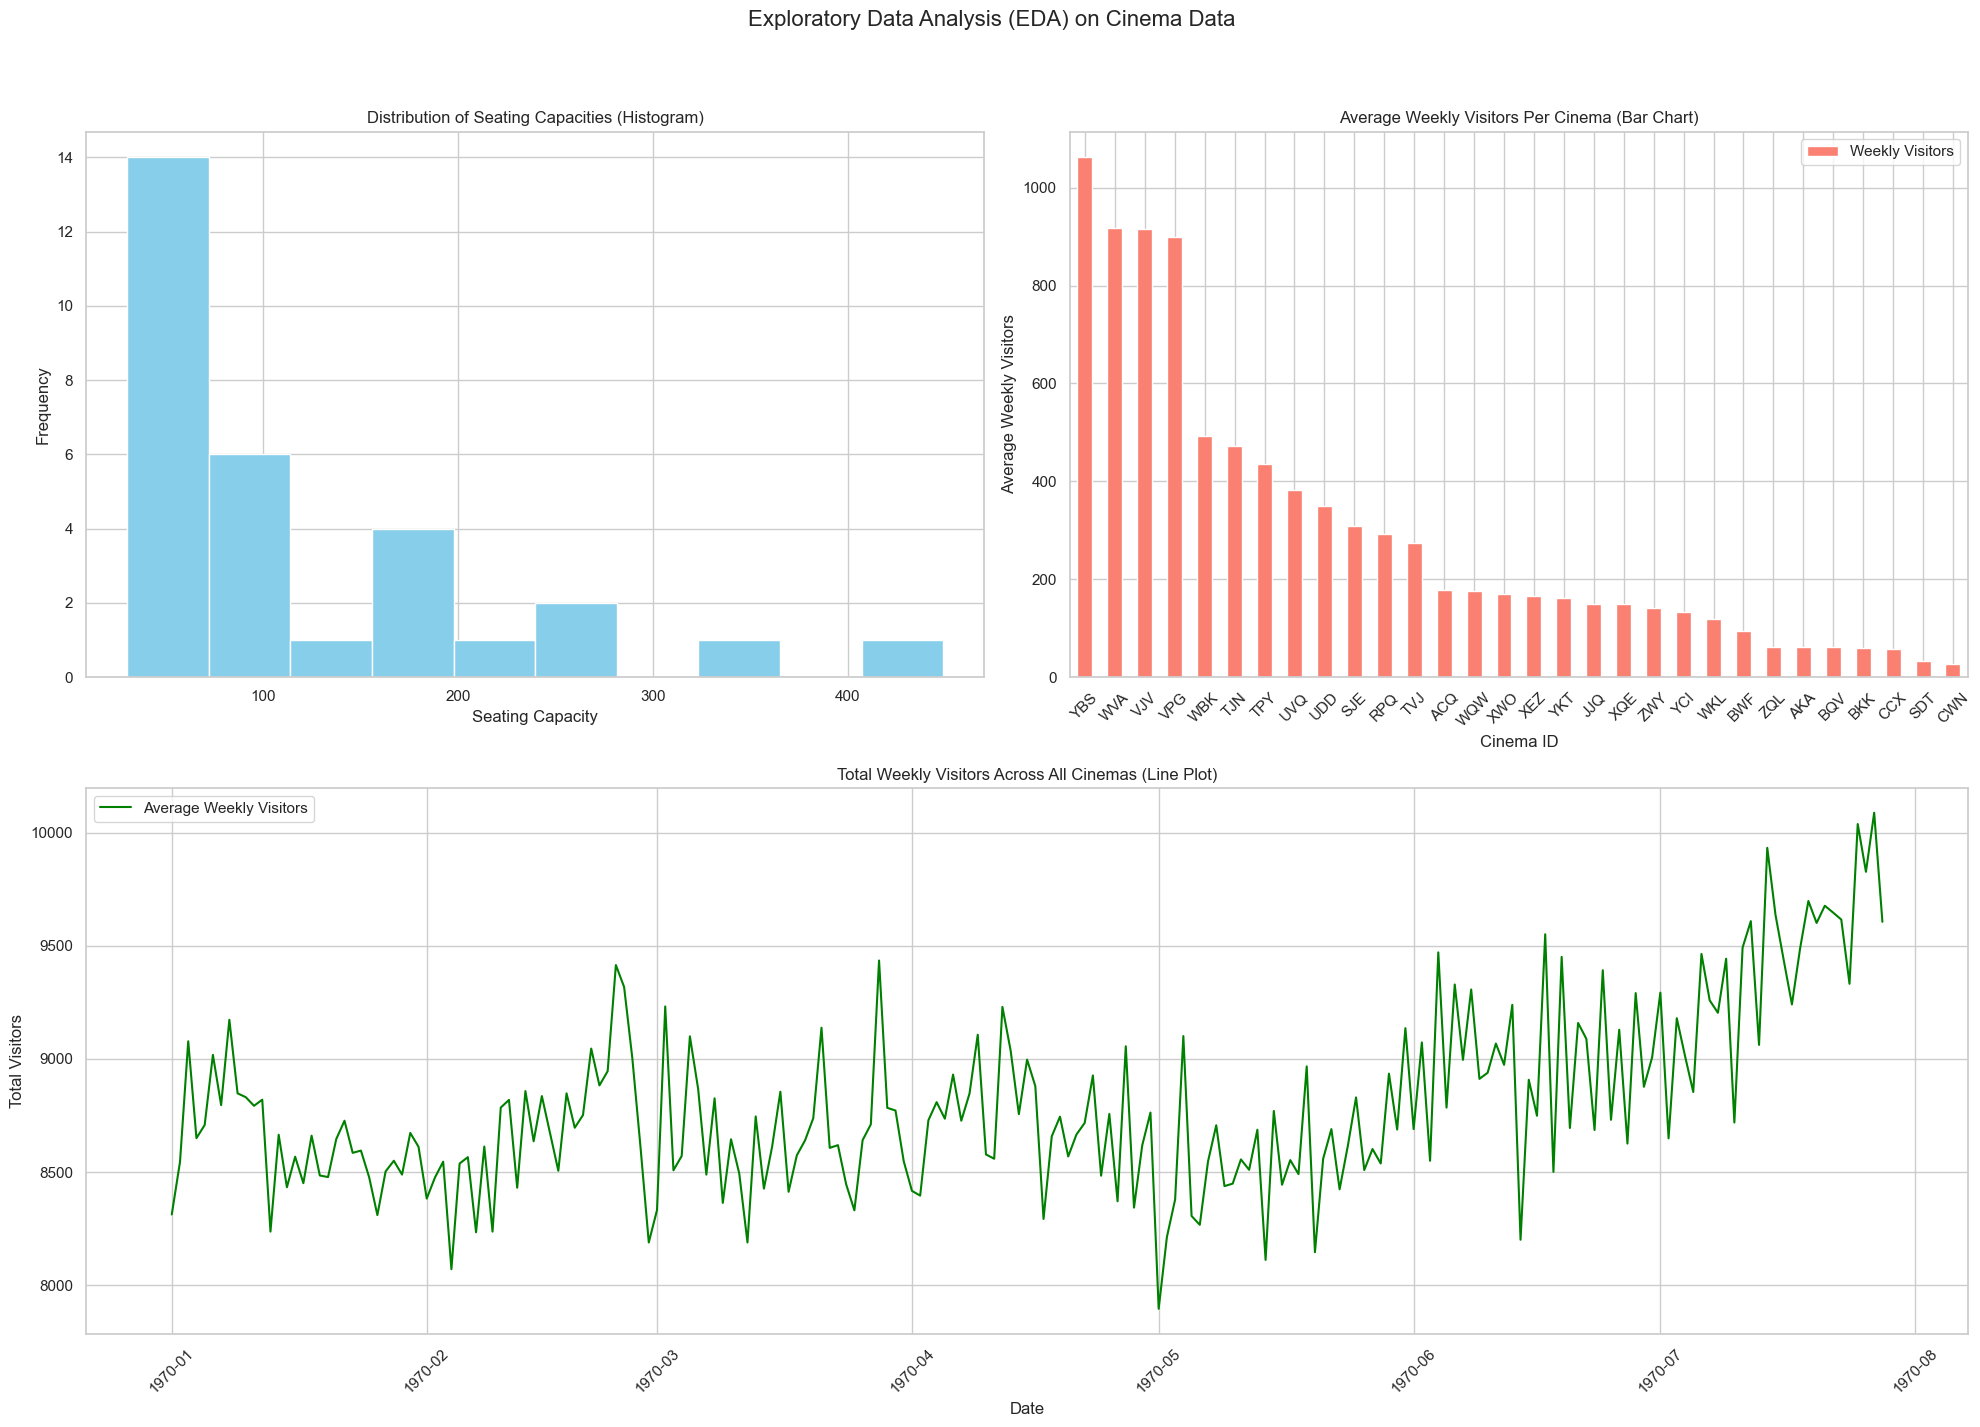

In [176]:
print("Summary DataFrame Descriptive Statistics:")
display(summary_df.describe())

print("Customer DataFrame Descriptive Statistics:")
display(customer_df.describe())

numeric_cols_summary_df = summary_df.select_dtypes(include=['float64', 'int64'])
print("\nCorrelation Matrix:")
display(numeric_cols_summary_df.corr())

fig = plt.figure(figsize=(20, 15))
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1], height_ratios=[3, 3])
fig.suptitle('Exploratory Data Analysis (EDA) on Cinema Data', fontsize=16)

ax0 = fig.add_subplot(gs[0, 0])
summary_df['Seating Capacity'].hist(color='skyblue')
ax0.set_title('Distribution of Seating Capacities (Histogram)')
ax0.set_xlabel('Seating Capacity')
ax0.set_ylabel('Frequency')

ax1 = fig.add_subplot(gs[0, 1])
average_visits_per_cinema = customer_df.groupby('Cinema ID')['Weekly Visitors'].mean()
average_visits_per_cinema = average_visits_per_cinema.sort_values(ascending=False)
average_visits_per_cinema.plot(kind='bar', color='salmon')
ax1.set_title('Average Weekly Visitors Per Cinema (Bar Chart)')
ax1.set_xlabel('Cinema ID')
ax1.set_ylabel('Average Weekly Visitors')
ax1.legend()
ax1.tick_params(axis='x', rotation=45)

ax2 = fig.add_subplot(gs[1, :])
total_visitors_per_week = customer_df.groupby('Date')['Weekly Visitors'].sum()
ax2.plot(total_visitors_per_week.index, total_visitors_per_week.values, label='Average Weekly Visitors', color='green')
ax2.set_title('Total Weekly Visitors Across All Cinemas (Line Plot)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Total Visitors')
ax2.legend()
ax2.tick_params(axis='x', rotation=45)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Average Age (Years) and Average Spend (£)**: The correlation of 0.595856 suggests a moderate positive relationship, meaning that as the average age of cinema-goers increases, their average spend tends to increase as well.

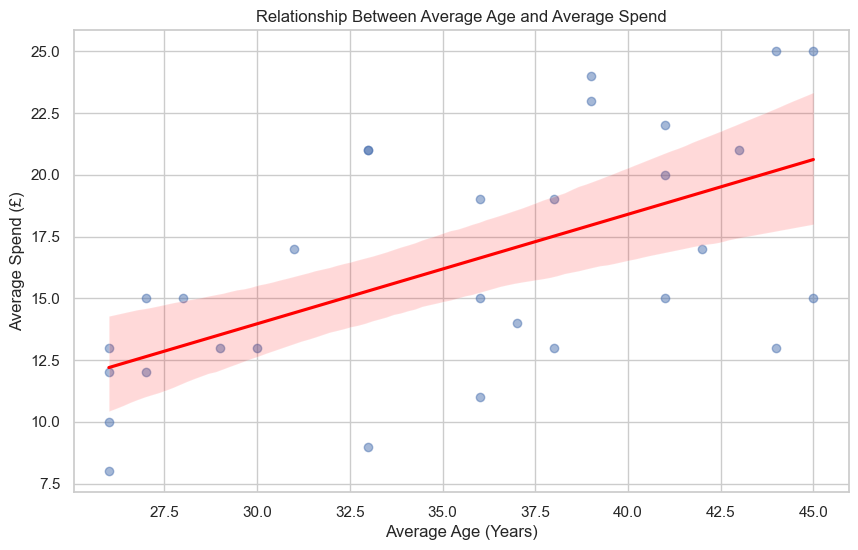

In [147]:
summary_copy = summary_df.copy()

summary_copy['Average Age (Years)'] = pd.to_numeric(summary_copy['Average Age (Years)'], errors='coerce')
summary_copy['Average Spend (£)'] = pd.to_numeric(summary_copy['Average Spend (£)'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.regplot(x='Average Age (Years)', y='Average Spend (£)', data=summary_copy, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relationship Between Average Age and Average Spend')
plt.xlabel('Average Age (Years)')
plt.ylabel('Average Spend (£)')
plt.show()

**Seating Capacity and Marketing Spend (£000s)**: With a correlation of 0.700083, there's a strong positive relationship here, indicating that cinemas with larger seating capacities tend to spend more on marketing.

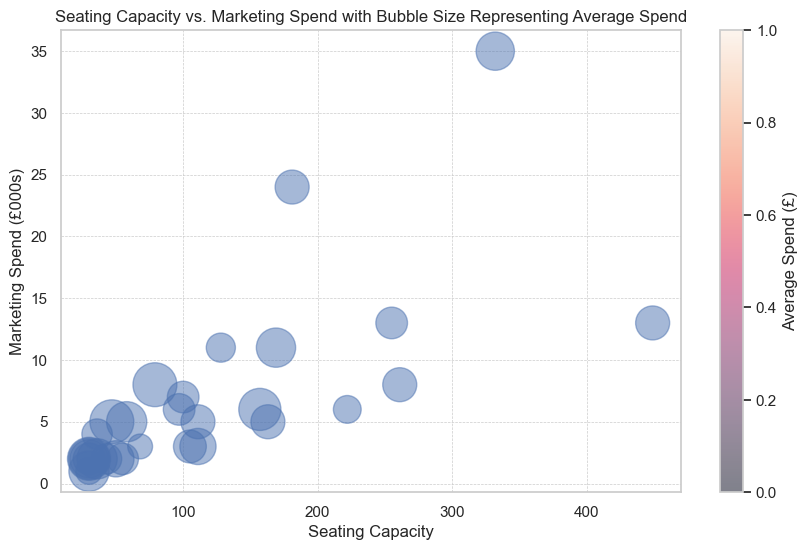

In [148]:
summary_copy = summary_df.copy()

bubble_size = summary_copy['Average Spend (£)'] / summary_copy['Average Spend (£)'].max() * 1000  # Adjust the scaling factor (1000 here) as needed

plt.figure(figsize=(10, 6))
plt.scatter(summary_copy['Seating Capacity'], summary_copy['Marketing Spend (£000s)'], s=bubble_size, alpha=0.5)
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.title('Seating Capacity vs. Marketing Spend with Bubble Size Representing Average Spend')
plt.colorbar(label='Average Spend (£)')  # Show color scale if bubble size represents another variable

plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.show()

**2D Density plot** (Experiment): With a correlation of 0.700083, there's a strong positive relationship here, indicating that cinemas with larger seating capacities tend to spend more on marketing.

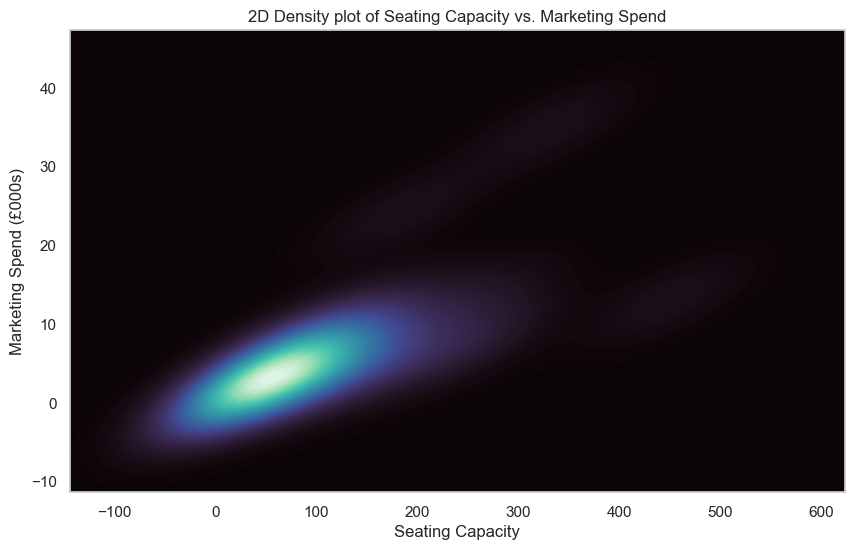

In [149]:
summary_copy = summary_df.copy()

plt.figure(figsize=(10, 6))
sns.kdeplot(data=summary_copy, x='Seating Capacity', y='Marketing Spend (£000s)', fill=True, thresh=0, levels=100, cmap="mako")
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.title('2D Density plot of Seating Capacity vs. Marketing Spend')
plt.show()

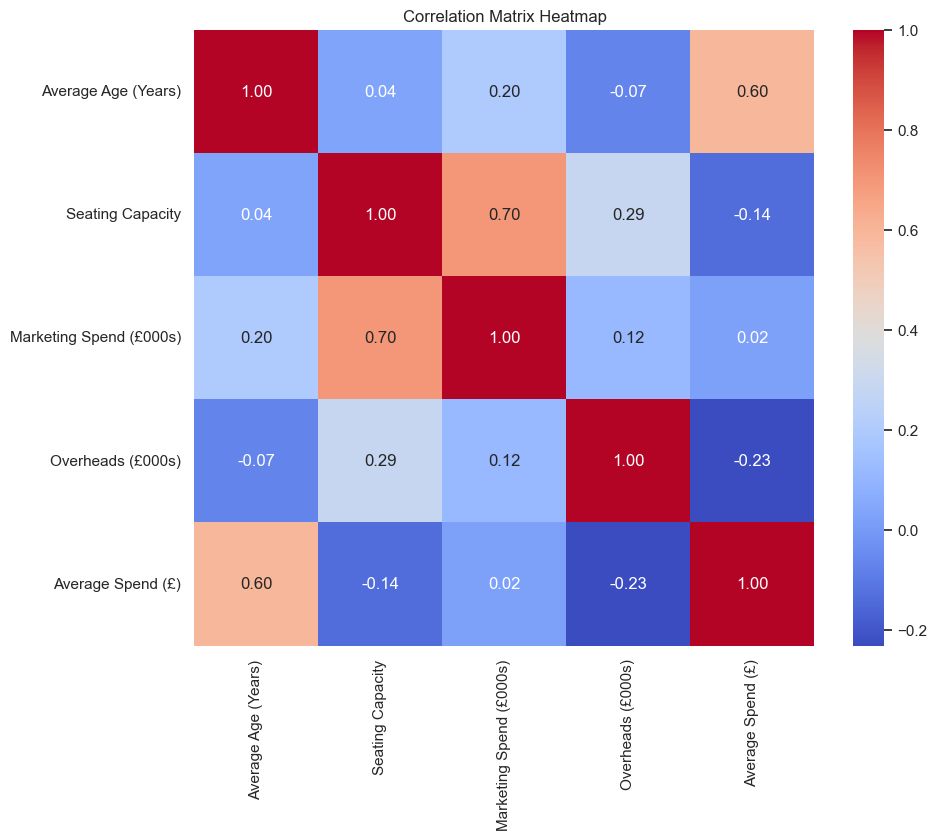

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

summary_copy = summary_df.copy()

numeric_cols_summary_df = summary_copy.select_dtypes(include=[ 'float64', 'int64' ])
correlation_matrix = numeric_cols_summary_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

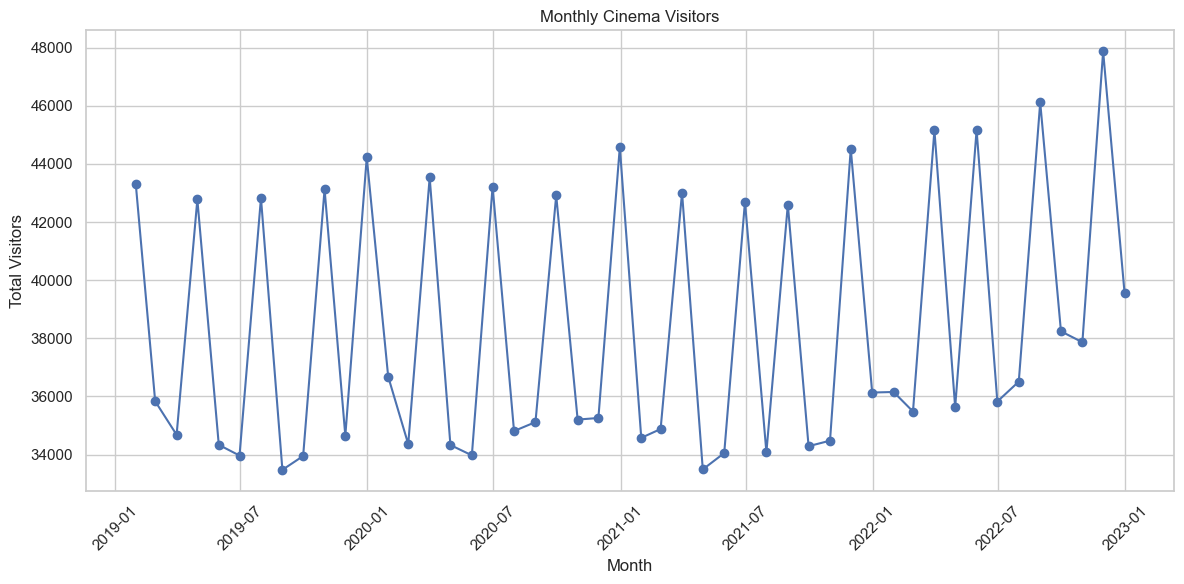

In [151]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
monthly_visitors = customer_copy.resample('ME', on='Date').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_visitors.index, monthly_visitors['Weekly Visitors'], marker='o', linestyle='-')
plt.title('Monthly Cinema Visitors')
plt.xlabel('Month')
plt.ylabel('Total Visitors')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

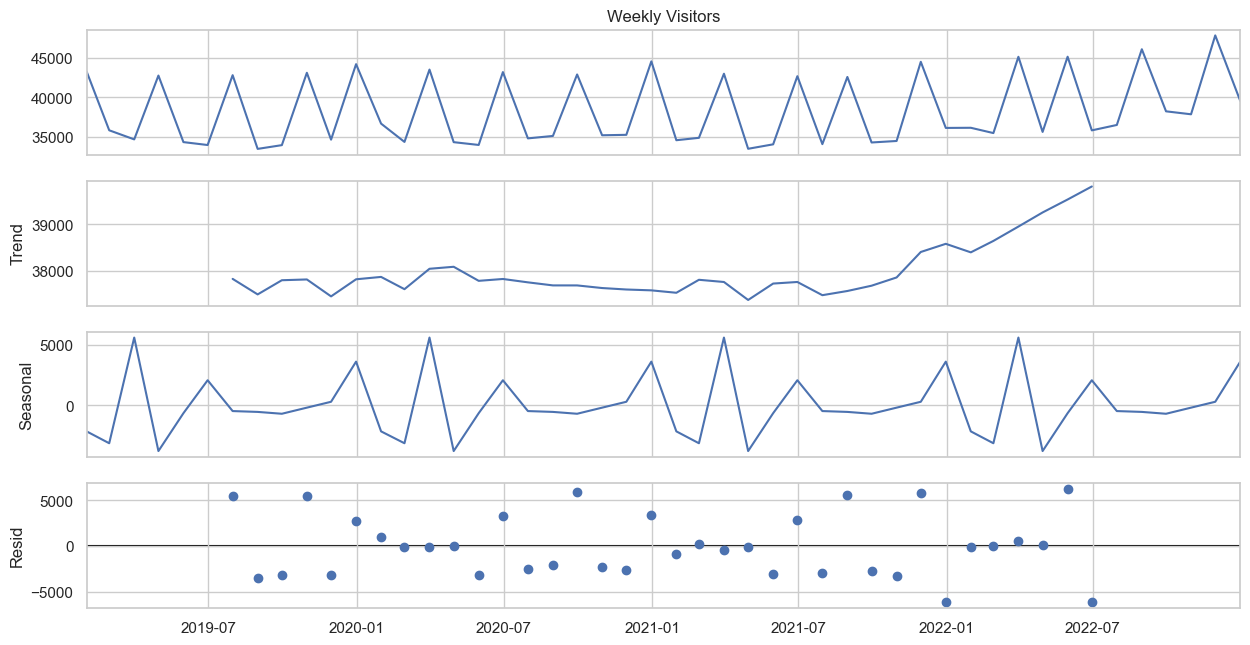

In [152]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
monthly_visitors = customer_copy.resample('ME', on='Date').sum()
decomposition = seasonal_decompose(monthly_visitors['Weekly Visitors'], model='additive')

fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

In [188]:
summary_copy = summary_df.copy()

Q1 = summary_copy['Marketing Spend (£000s)'].quantile(0.25)
Q3 = summary_copy['Marketing Spend (£000s)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = summary_copy[(summary_copy['Marketing Spend (£000s)'] < lower_bound) | 
                        (summary_copy['Marketing Spend (£000s)'] > upper_bound)]

display(summary_copy[['Marketing Spend (£000s)']].hvplot.box())

display(outliers)

summary_copy.hvplot.scatter(x='Seating Capacity', y='Marketing Spend (£000s)', hover_cols=['Cinema ID'])

:BoxWhisker   (Marketing Spend (£000s))

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
3,WVA,45,181,24,58,15
13,YBS,36,332,35,56,19


:Scatter   [Seating Capacity]   (Marketing Spend (£000s),Cinema ID)

**Outliers Identification**: The box plot for 'Marketing Spend (£000s)' shows at least one cinema (possibly the one with Cinema ID 'YBS') that appears to be an outlier with a significantly higher marketing spend than others. Box plots display the median, quartiles, and whiskers that typically extend to 1.5 * IQR (Interquartile Range) from the quartiles. Points outside this range are considered outliers and are marked individually.

**Scatter Plot Observations**: The scatter plot of 'Marketing Spend (£000s)' versus 'Seating Capacity' provides a visual indication of the relationship between these two variables. Most data points seem to cluster towards the lower end of both axes, suggesting that many cinemas have smaller capacities and spend less on marketing. The cinema with ID 'YBS' stands out with a high seating capacity and the highest marketing spend, which corroborates its identification as an outlier in the box plot.

---

In [190]:
z_scores = stats.zscore(summary_copy['Marketing Spend (£000s)'])

outliers_z = summary_copy[(np.abs(z_scores) > 3)]

display(outliers_z)

,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£)
13,YBS,36,332,35,56,19


**Summary Table Insights**: The rows in the summary table likely represent the outliers identified in the visualizations. For instance, the cinema with ID 'WVA' might be on the higher end but not extreme enough to be considered an outlier. In contrast, 'YBS' shows values that are significantly higher for both 'Seating Capacity' and 'Marketing Spend (£000s)', indicating it's an outlier.

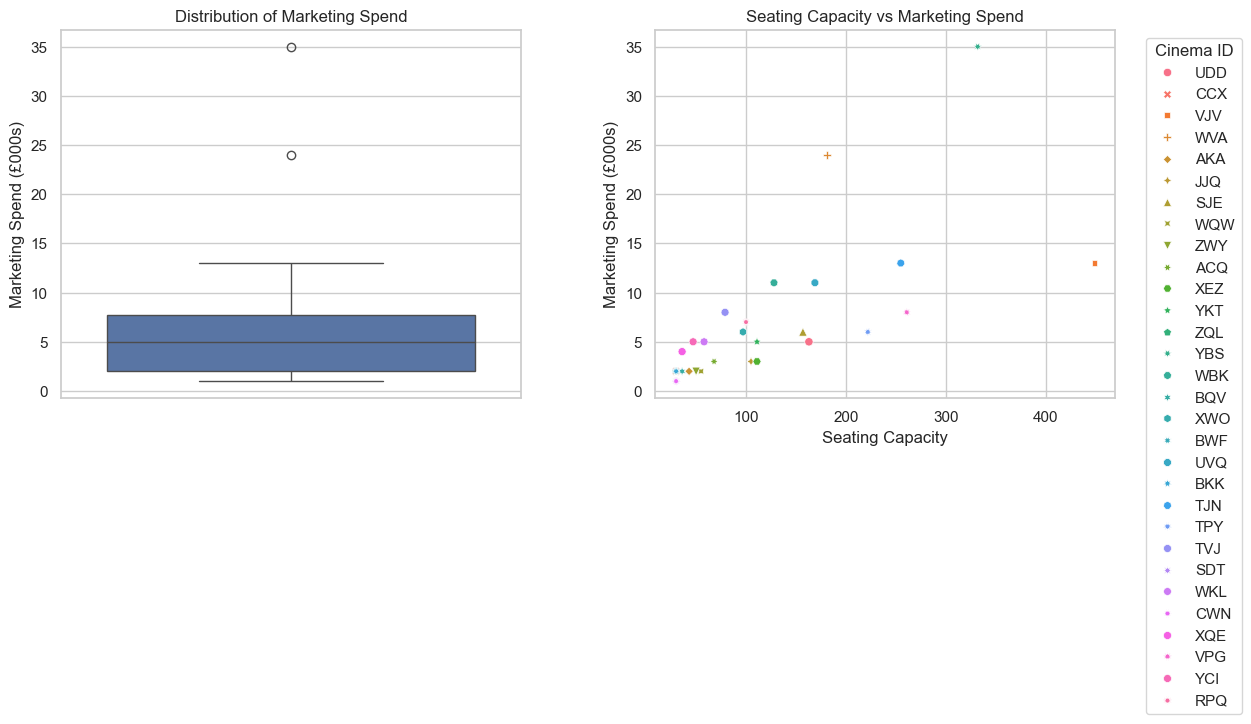

In [191]:
sns.set_style('whitegrid')

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=summary_df, y='Marketing Spend (£000s)')
plt.title('Distribution of Marketing Spend')

plt.subplot(1, 2, 2)
sns.scatterplot(data=summary_df, x='Seating Capacity', y='Marketing Spend (£000s)', hue='Cinema ID', style='Cinema ID')
plt.title('Seating Capacity vs Marketing Spend')
plt.legend(title='Cinema ID', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

plt.tight_layout(pad=5)

plt.show()

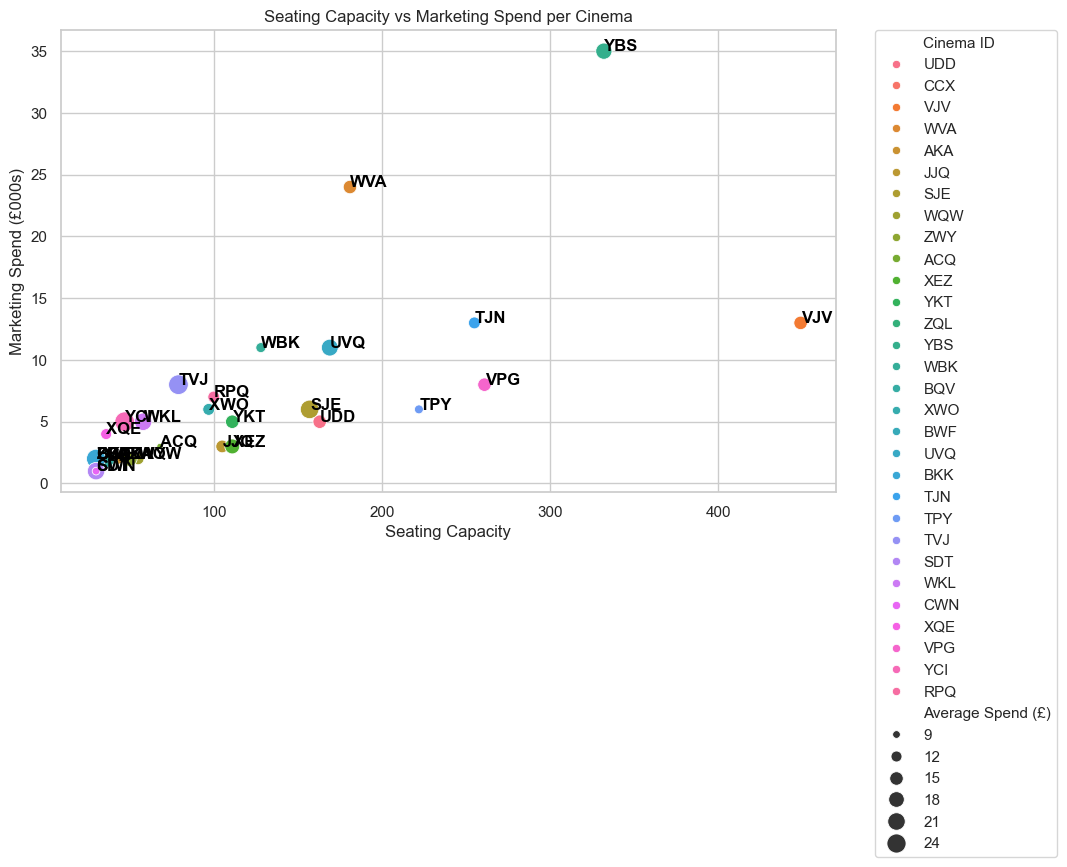

In [158]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(data=summary_df, x='Seating Capacity', y='Marketing Spend (£000s)', size='Average Spend (£)', hue='Cinema ID', sizes=(20, 200))

for line in range(0, summary_df.shape[0]):
     scatter.text(summary_df['Seating Capacity'][line]+0.2, summary_df['Marketing Spend (£000s)'][line], summary_df['Cinema ID'][line], horizontalalignment='left', size='medium', color='black', weight='semibold')

plt.title('Seating Capacity vs Marketing Spend per Cinema')
plt.xlabel('Seating Capacity')
plt.ylabel('Marketing Spend (£000s)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.show()

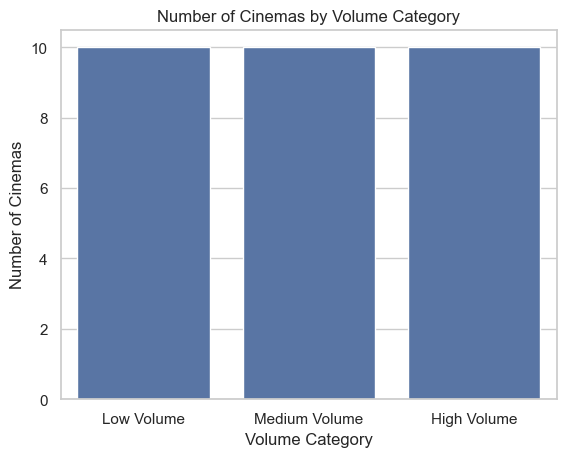

In [159]:
customer_copy = customer_df.copy()

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
volume_quantiles = total_volume['Weekly Visitors'].quantile([0.33, 0.66])

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)

sns.countplot(data=total_volume, x='Volume Category', order=['Low Volume', 'Medium Volume', 'High Volume'])
plt.title('Number of Cinemas by Volume Category')
plt.xlabel('Volume Category')
plt.ylabel('Number of Cinemas')
plt.show()

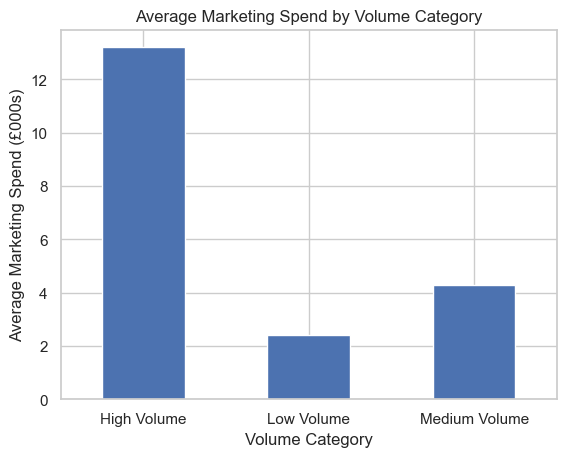

In [160]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)
volume_quantiles = total_volume['Weekly Visitors'].quantile([0.33, 0.66])
summary_df_with_volume = pd.merge(summary_copy, total_volume[['Cinema ID', 'Volume Category']], on='Cinema ID', how='left')
avg_marketing_by_volume = summary_df_with_volume.groupby('Volume Category')['Marketing Spend (£000s)'].mean()

avg_marketing_by_volume.plot(kind='bar')
plt.title('Average Marketing Spend by Volume Category')
plt.xlabel('Volume Category')
plt.ylabel('Average Marketing Spend (£000s)')
plt.xticks(rotation=0)  # Keep the category labels horizontal for readability
plt.show()

---

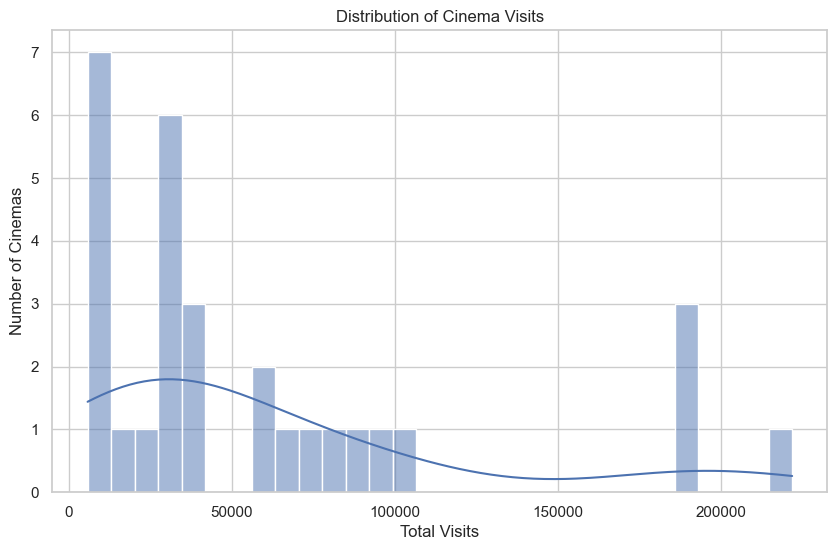

In [161]:
customer_copy = customer_df.copy()

cinema_visits = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.histplot(cinema_visits['Weekly Visitors'], bins=30, kde=True)
plt.title('Distribution of Cinema Visits')
plt.xlabel('Total Visits')
plt.ylabel('Number of Cinemas')
plt.show()

**Pairplot for High Volume Cinemas**: This plot gives us an idea of the relationships between different financial metrics. For instance, if there is a positive correlation between marketing spend and weekly visitors, it might suggest that increased marketing efforts contribute to higher footfall. Similarly, we can observe how overheads relate to marketing spend and whether a higher average spend per visitor correlates with higher total visitors. There might be outliers or clusters that are worth investigating further.

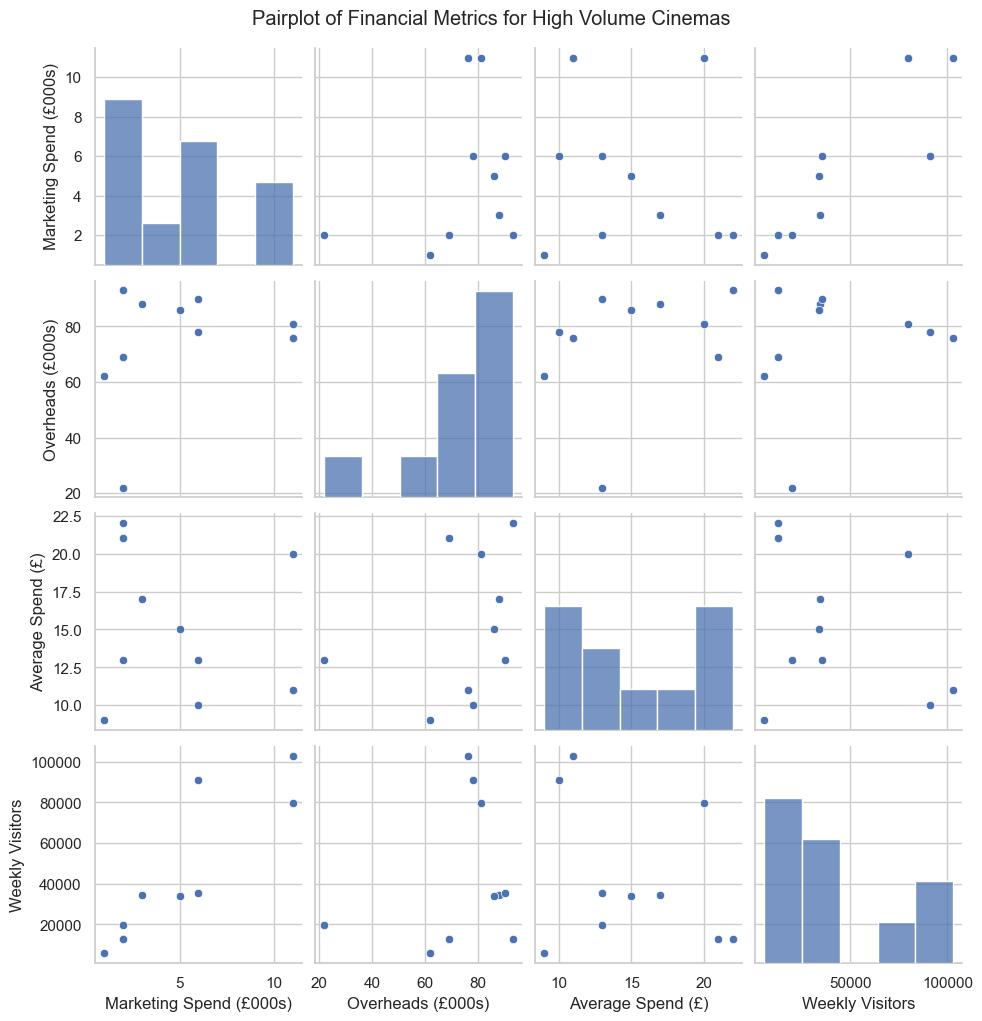

In [162]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

cinema_visits = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

quantiles = cinema_visits['Weekly Visitors'].quantile([0.33, 0.66])
low_threshold, high_threshold = quantiles[0.33], quantiles[0.66]

high_volume = cinema_visits[cinema_visits['Weekly Visitors'] > high_threshold]
medium_volume = cinema_visits[(cinema_visits['Weekly Visitors'] > low_threshold) & (cinema_visits['Weekly Visitors'] <= high_threshold)]
low_volume = cinema_visits[cinema_visits['Weekly Visitors'] <= low_threshold]

total_volume = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()

def volume_category(visitor_count):
    if visitor_count <= volume_quantiles.iloc[0]:
        return 'Low Volume'
    elif visitor_count <= volume_quantiles.iloc[1]:
        return 'Medium Volume'
    else:
        return 'High Volume'

total_volume['Volume Category'] = total_volume['Weekly Visitors'].apply(volume_category)

summary_copy['Volume Category'] = pd.cut(
    cinema_visits['Weekly Visitors'], 
    bins=[-np.inf, low_threshold, high_threshold, np.inf], 
    labels=['Low', 'Medium', 'High']
)

summary_copy = summary_copy.merge(
    cinema_visits[['Cinema ID', 'Weekly Visitors']], 
    on='Cinema ID', 
    how='left'
)

high_volume_df = summary_copy[summary_copy['Volume Category'] == 'High']

sns.pairplot(high_volume_df[['Marketing Spend (£000s)', 'Overheads (£000s)', 'Average Spend (£)', 'Weekly Visitors']])
plt.suptitle('Pairplot of Financial Metrics for High Volume Cinemas', y=1.02)
plt.show()

**Marketing Spend vs. Average Spend for Medium Volume Cinemas**: This scatter plot aims to reveal if there's a relationship between the marketing spend and the average spend per visitor. The size of the markers indicates seating capacity, while their color and size also represent the weekly visitors. This plot could suggest how effective marketing spend is in influencing visitor spending and if seating capacity is related to either metric.


First few rows of summary_copy after merging:


,Cinema ID,Average Age (Years),Seating Capacity,Marketing Spend (£000s),Overheads (£000s),Average Spend (£),Total Visitors
0,UDD,27,163,5,65,15,73168
1,CCX,38,30,2,18,19,11936
2,VJV,41,449,13,87,15,191476
3,WVA,45,181,24,58,15,191783
4,AKA,26,43,2,13,12,12758



'Total Visitors' column successfully added.


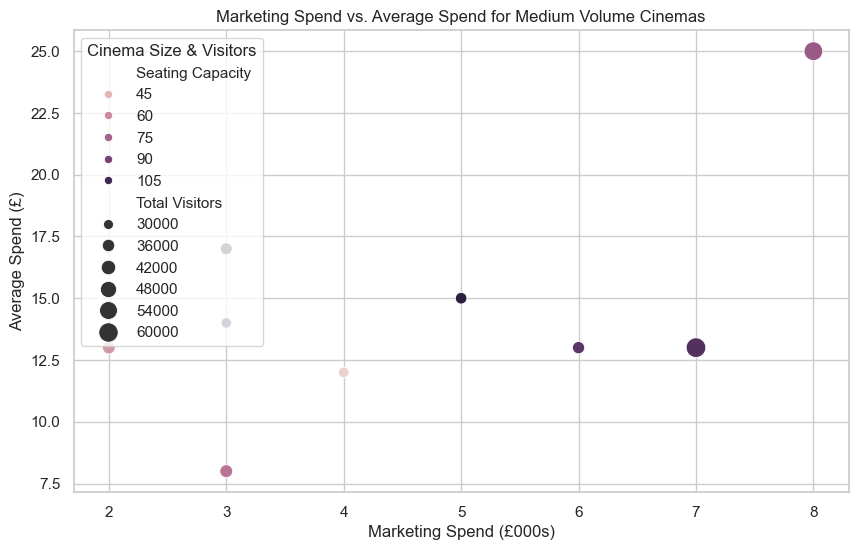

In [192]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema.rename(columns={'Weekly Visitors': 'Total Visitors'}, inplace=True)

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')

print("\nFirst few rows of summary_copy after merging:")
display(summary_copy.head())

if 'Total Visitors' in summary_copy.columns:
    print("\n'Total Visitors' column successfully added.")

    quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66]).values
    summary_copy['Volume Category'] = pd.cut(
        summary_copy['Total Visitors'], 
        bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
        labels=['Low', 'Medium', 'High']
    )

    medium_volume_df = summary_copy[summary_copy['Volume Category'] == 'Medium']

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='Marketing Spend (£000s)', 
        y='Average Spend (£)', 
        hue='Seating Capacity', 
        size='Total Visitors', 
        sizes=(50, 200), 
        data=medium_volume_df
    )
    plt.title('Marketing Spend vs. Average Spend for Medium Volume Cinemas')
    plt.xlabel('Marketing Spend (£000s)')
    plt.ylabel('Average Spend (£)')
    plt.legend(title='Cinema Size & Visitors', loc='upper left')
    plt.show()
else:
    print("\nError: 'Total Visitors' column not added. Please check the merge operation.")

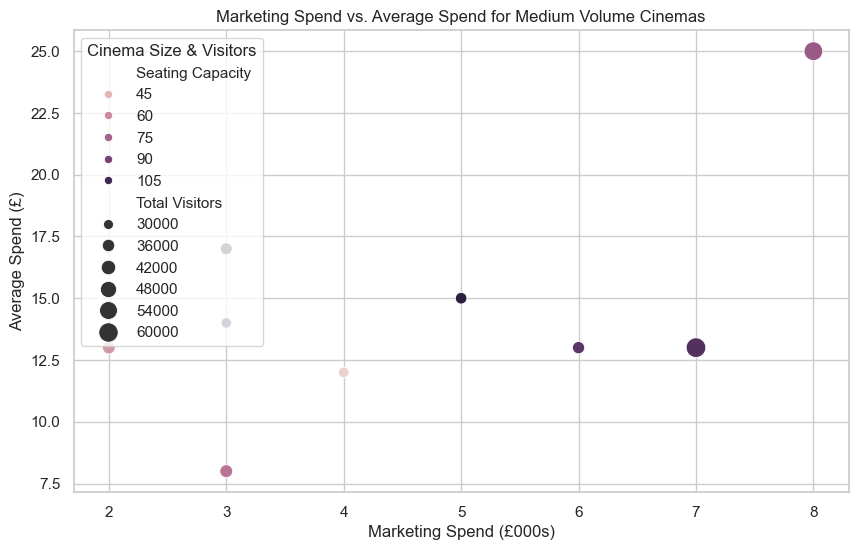

In [164]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema.rename(columns={'Weekly Visitors': 'Total Visitors'}, inplace=True)

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')

quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66]).values
summary_copy['Volume Category'] = pd.cut(summary_copy['Total Visitors'], 
                                       bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
                                       labels=['Low', 'Medium', 'High'])

medium_volume_df = summary_copy[summary_copy['Volume Category'] == 'Medium']

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Marketing Spend (£000s)', 
    y='Average Spend (£)', 
    hue='Seating Capacity', 
    size='Total Visitors',
    sizes=(50, 200), 
    data=medium_volume_df
)
plt.title('Marketing Spend vs. Average Spend for Medium Volume Cinemas')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Spend (£)')
plt.legend(title='Cinema Size & Visitors', loc='upper left')
plt.show()

**Seating Capacity vs. Average Spend for Low Volume Cinemas**: This visualization displays seating capacity against average spend per visitor for low volume cinemas, with the size of the markers representing the number of weekly visitors. A relationship between seating capacity and average spend could indicate that larger cinemas might not be capitalizing on their potential to generate higher revenue per visitor, or that despite having a high seating capacity, the visitor numbers are low.

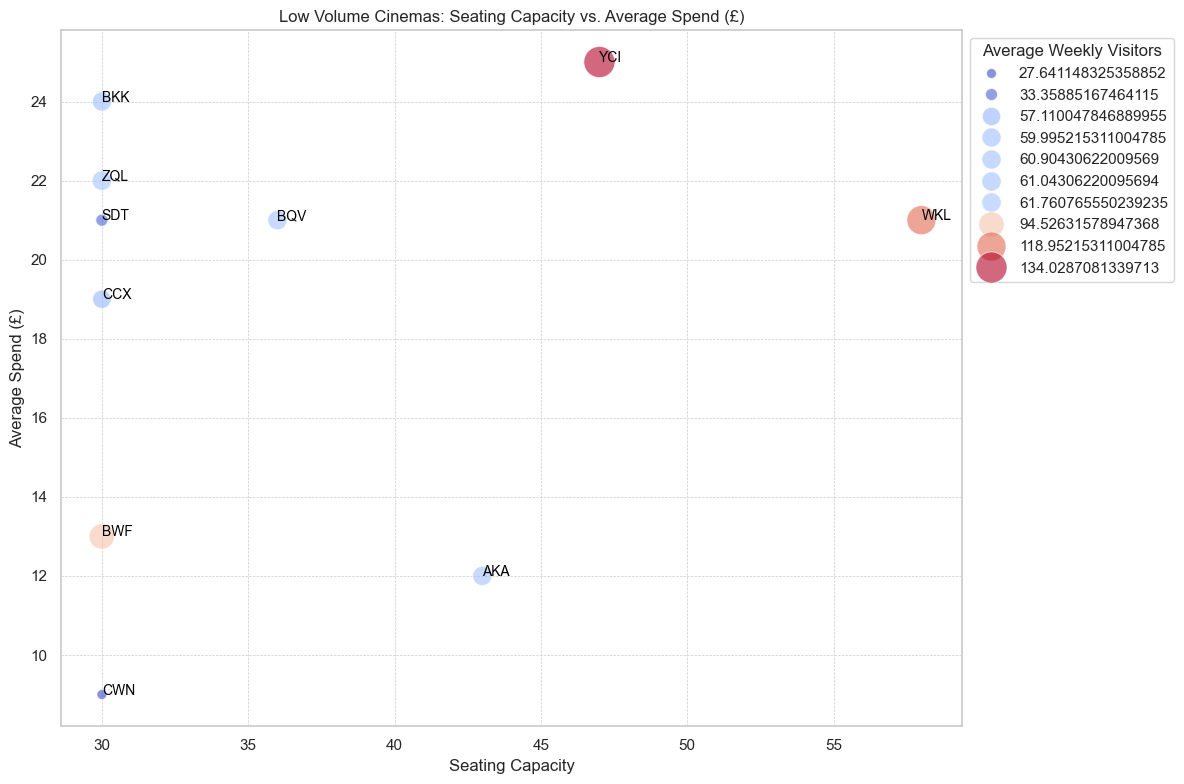

In [165]:
customer_copy = customer_df.copy()
summary_copy = summary_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index().rename(columns={'Weekly Visitors': 'Total Visitors'})
average_weekly_visitors = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index().rename(columns={'Weekly Visitors': 'Average Weekly Visitors'})

summary_copy = summary_copy.merge(total_visitors_per_cinema, on='Cinema ID', how='left')
summary_copy = summary_copy.merge(average_weekly_visitors, on='Cinema ID', how='left')

quantiles = summary_copy['Total Visitors'].quantile([0.33, 0.66])
summary_copy['Volume Category'] = pd.cut(summary_copy['Total Visitors'], bins=[-np.inf, quantiles[0.33], quantiles[0.66], np.inf], labels=['Low', 'Medium', 'High'])

low_volume_df = summary_copy[summary_copy['Volume Category'] == 'Low']

plt.figure(figsize=(12, 8))

scatter = sns.scatterplot(data=low_volume_df, 
                          x='Seating Capacity', 
                          y='Average Spend (£)', 
                          size='Average Weekly Visitors', 
                          hue='Average Weekly Visitors',
                          palette='coolwarm',
                          sizes=(50, 500),
                          alpha=0.6,
                          legend='full')

for i in range(len(low_volume_df)):
    plt.text(x=low_volume_df['Seating Capacity'].iloc[i],
             y=low_volume_df['Average Spend (£)'].iloc[i],
             s=low_volume_df['Cinema ID'].iloc[i],
             fontdict=dict(color='black', size=10))

scatter.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Average Weekly Visitors')
plt.title('Low Volume Cinemas: Seating Capacity vs. Average Spend (£)')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Spend (£)')
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

**Weekly Visitors Trend**: This plot exhibits fluctuations that are common on a week-by-week basis. The variability could be due to various factors including movie releases, holidays, and other events that influence cinema attendance.

**Monthly Average Visitors Trend**: The monthly plot smoothens out the weekly variations and shows a clearer trend. It appears there's an overall upward trend in the monthly average number of visitors. However, there are periods where the number dips, which may correspond to seasonal changes or other factors.

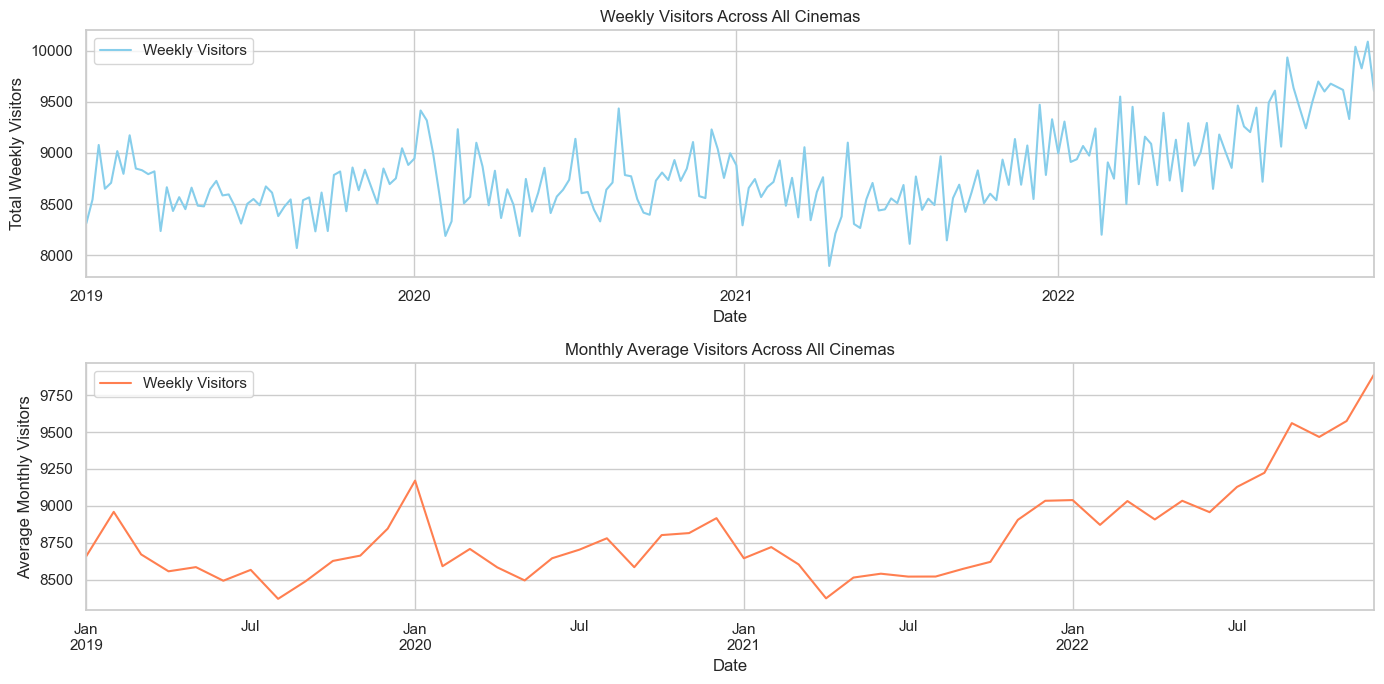

In [193]:
customer_copy = customer_df.copy()

customer_copy['Date'] = pd.to_datetime(customer_copy['Date'])
customer_copy.index = customer_copy.set_index('Date')

total_visitors_weekly = customer_copy.groupby('Date')['Weekly Visitors'].sum()
total_visitors_monthly = total_visitors_weekly.resample('ME').mean()

plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
total_visitors_weekly.plot(title='Weekly Visitors Across All Cinemas', color='skyblue')
plt.ylabel('Total Weekly Visitors')
plt.legend()

plt.subplot(2, 1, 2)
total_visitors_monthly.plot(title='Monthly Average Visitors Across All Cinemas', color='coral')
plt.ylabel('Average Monthly Visitors')

plt.tight_layout()
plt.legend()
plt.show()

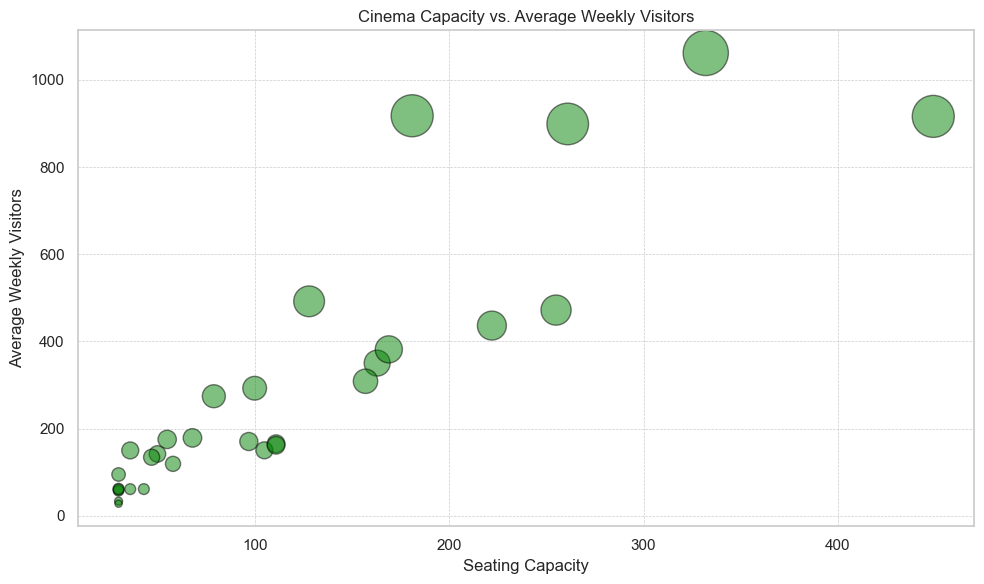

In [167]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy[['Cinema ID', 'Seating Capacity']], average_weekly_visitors_copy, on='Cinema ID', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Seating Capacity'], merged_df['Weekly Visitors'], 
            s=merged_df['Weekly Visitors'], # Bubble size determined by average weekly visitors
            alpha=0.5, color='green', edgecolor='black', linewidth=1)

plt.title('Cinema Capacity vs. Average Weekly Visitors')
plt.xlabel('Seating Capacity')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

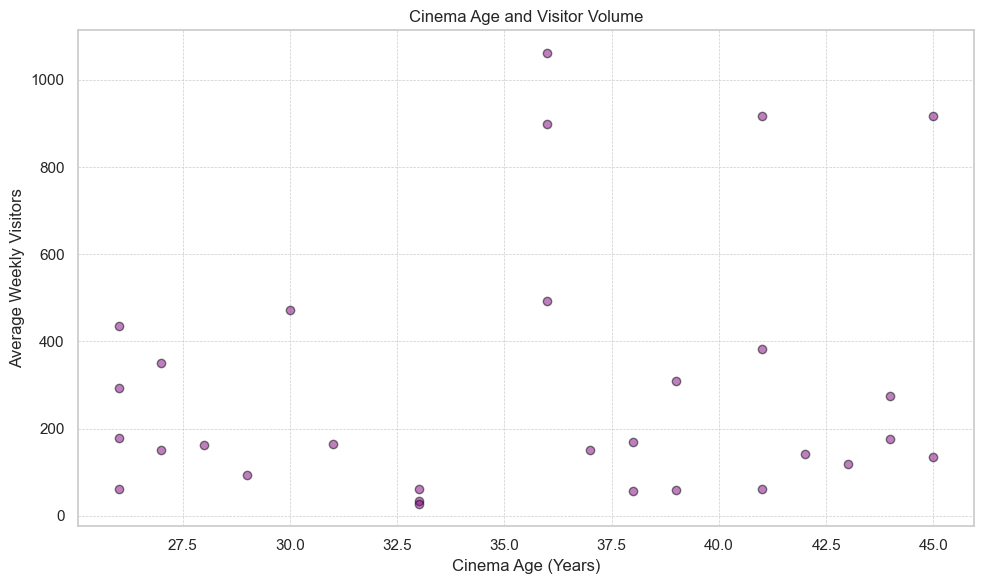

In [168]:
summary_copy = summary_df[['Cinema ID', 'Average Age (Years)']].copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy, average_weekly_visitors_copy, on='Cinema ID', how='inner')

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Average Age (Years)'], merged_df['Weekly Visitors'], 
            color='purple', alpha=0.5, edgecolor='black', linewidth=1)

plt.title('Cinema Age and Visitor Volume')
plt.xlabel('Cinema Age (Years)')
plt.ylabel('Average Weekly Visitors')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

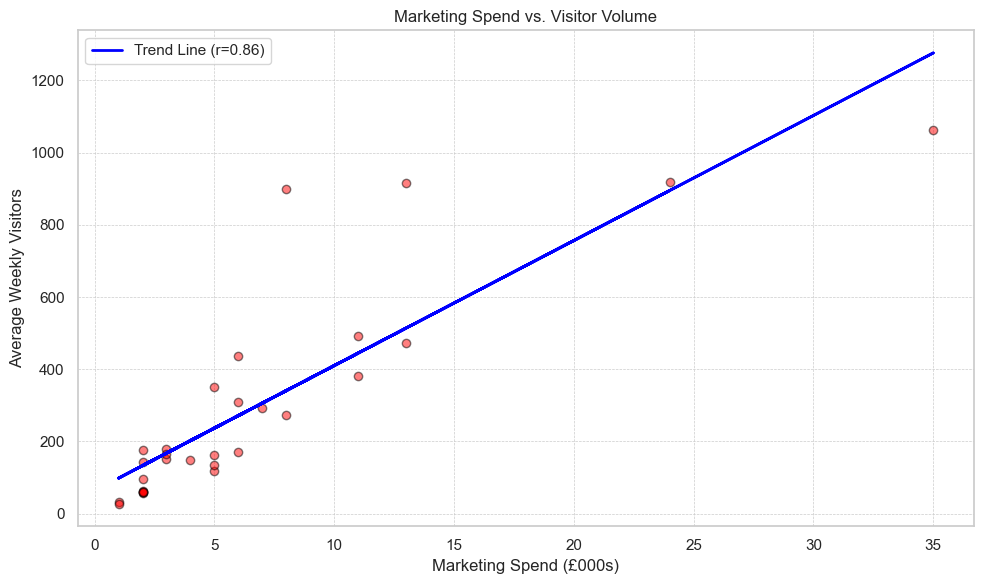

In [169]:
summary_copy = summary_df.copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy[['Cinema ID', 'Marketing Spend (£000s)']], 
                     average_weekly_visitors_copy, 
                     on='Cinema ID', 
                     how='inner')

slope, intercept, r_value, p_value, std_err = linregress(merged_df['Marketing Spend (£000s)'], merged_df['Weekly Visitors'])
line = slope * merged_df['Marketing Spend (£000s)'] + intercept

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['Marketing Spend (£000s)'], merged_df['Weekly Visitors'], 
            color='red', alpha=0.5, edgecolor='black', linewidth=1)
plt.plot(merged_df['Marketing Spend (£000s)'], line, color='blue', linewidth=2, 
         label=f'Trend Line (r={r_value:.2f})')

plt.title('Marketing Spend vs. Visitor Volume')
plt.xlabel('Marketing Spend (£000s)')
plt.ylabel('Average Weekly Visitors')
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

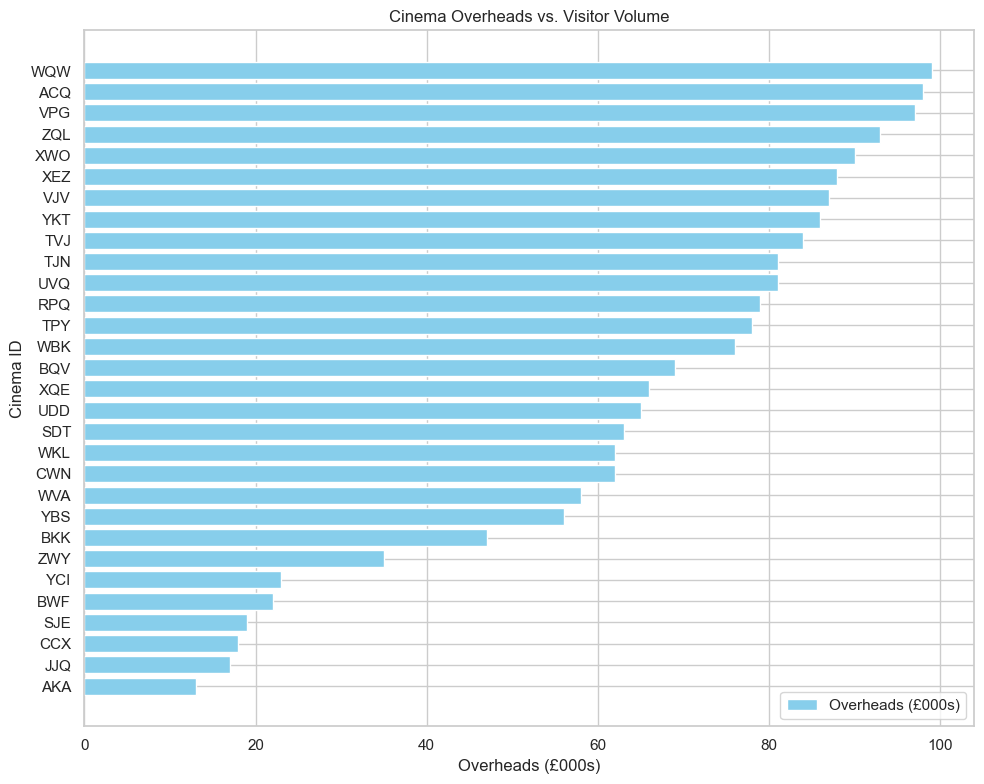

In [170]:
summary_copy = summary_df[['Cinema ID', 'Overheads (£000s)']].copy()
customer_copy = customer_df.copy()

average_weekly_visitors_copy = customer_copy.groupby('Cinema ID')['Weekly Visitors'].mean().reset_index()

merged_df = pd.merge(summary_copy, average_weekly_visitors_copy, on='Cinema ID', how='inner')

merged_df_sorted = merged_df.sort_values(by='Overheads (£000s)', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(merged_df_sorted['Cinema ID'], merged_df_sorted['Overheads (£000s)'], color='skyblue', label='Overheads (£000s)')
plt.xlabel('Overheads (£000s)')
plt.ylabel('Cinema ID')
plt.title('Cinema Overheads vs. Visitor Volume')
plt.legend()
plt.tight_layout()
plt.show()

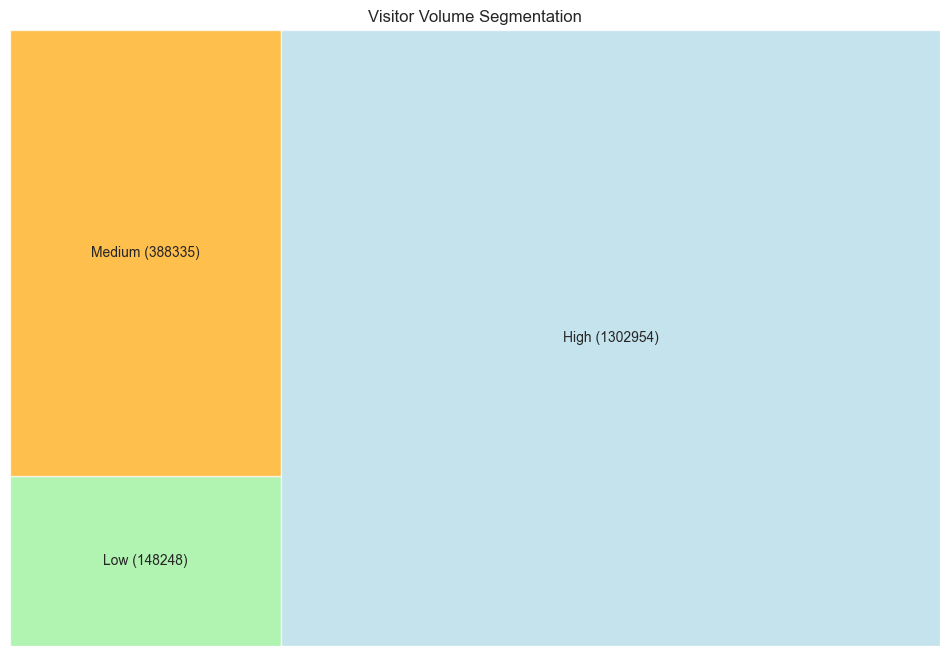

In [197]:
customer_copy = customer_df.copy()

total_visitors_per_cinema = customer_copy.groupby('Cinema ID')['Weekly Visitors'].sum().reset_index()
total_visitors_per_cinema['Volume Category'] = pd.qcut(total_visitors_per_cinema['Weekly Visitors'], 
                                                       3, labels=['Low', 'Medium', 'High'])

volume_per_category = total_visitors_per_cinema.groupby('Volume Category', observed=True)['Weekly Visitors'].sum().reset_index()

labels = volume_per_category.apply(lambda x: f"{x['Volume Category']} ({x['Weekly Visitors']})", axis=1)
sizes = volume_per_category['Weekly Visitors']
colors = ['lightgreen', 'orange', 'lightblue']

plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, text_kwargs={'fontsize':10})
plt.axis('off')
plt.title('Visitor Volume Segmentation')
plt.show()

In [206]:
# pn.extension('tabulator', comms='vscode')

customer_df_copy = customer_df.copy()

customer_df_copy['Date'] = pd.to_datetime(customer_df_copy['Date'])

def get_visitor_trends(cinema_id, date_range):
    df = customer_df_copy.loc[customer_df_copy['Cinema ID'] == cinema_id]
    df = df.loc[df['Date'].between(pd.to_datetime(date_range[0]), pd.to_datetime(date_range[1]))]
    return df.hvplot.line(x='Date', y='Weekly Visitors', title=f"Weekly Visitors for Cinema {cinema_id}")

cinema_id_select = pn.widgets.Select(name='Cinema ID', options=list(customer_df_copy['Cinema ID'].unique()))
date_range_slider = pn.widgets.DateRangeSlider(name='Date Range',
                                               start=customer_df_copy['Date'].min(),
                                               end=customer_df_copy['Date'].max(),
                                               value=(customer_df_copy['Date'].min(), customer_df_copy['Date'].max()))

def update_visitor_trends(event):
    cinema_id = cinema_id_select.value
    date_range = date_range_slider.value
    visitor_trends_plot.object = get_visitor_trends(cinema_id, date_range)

cinema_id_select.param.watch(update_visitor_trends, 'value')
date_range_slider.param.watch(update_visitor_trends, 'value')

visitor_trends_plot = pn.panel(get_visitor_trends(cinema_id_select.value, date_range_slider.value), sizing_mode='stretch_width')

dashboard = pn.Column("# Individual Cinema Performance Dashboard", pn.Row(cinema_id_select, date_range_slider), visitor_trends_plot)
dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'f7e2a539-7bc3-4b69-9eca-645c2440fabc': {'version…

In [208]:
# pn.extension('tabulator', comms='vscode')

customer_df_copy = customer_df.copy()

customer_df_copy = customer_df_copy[customer_df_copy['Cinema ID'] != 'Total Weekly Visitors']

color_palette = cc.glasbey_dark

total_visitors_per_cinema = customer_df_copy.groupby('Cinema ID')['Weekly Visitors'].sum()

quantiles = total_visitors_per_cinema.quantile([0.33, 0.66]).values
cinema_volume_category = pd.cut(total_visitors_per_cinema, 
                                bins=[-np.inf, quantiles[0], quantiles[1], np.inf], 
                                labels=['Low', 'Medium', 'High'])

cinema_color_map = {cinema: color for cinema, color in zip(total_visitors_per_cinema.index, color_palette)}

volume_category_select = pn.widgets.Select(name='Volume Category', options=['High', 'Medium', 'Low'])

def get_interactive_plot(volume_category):
    selected_cinemas = cinema_volume_category[cinema_volume_category == volume_category].index
    df = customer_df_copy[customer_df_copy['Cinema ID'].isin(selected_cinemas)]
    
    unique_cinemas = df['Cinema ID'].unique()
    colors = [cinema_color_map[cid] for cid in unique_cinemas]
    
    return df.hvplot(x='Date', y='Weekly Visitors', by='Cinema ID', color=colors,
                     title=f'{volume_category} Volume Cinemas Weekly Visitors').opts(
                         min_height=400
                     )

@pn.depends(volume_category=volume_category_select.param.value)
def update_plot(volume_category):
    return get_interactive_plot(volume_category)

dashboard = pn.Column("# Cinema Performance Dashboard",
                      volume_category_select,
                      pn.panel(update_plot, sizing_mode='stretch_width'),
                      sizing_mode='stretch_width')

dashboard.servable()

BokehModel(combine_events=True, render_bundle={'docs_json': {'1a0272fe-448d-4cc8-a42a-67be03003c12': {'version…